**Problem 10.1:**

Compute, by hand, the second-degree Lagrange polynomial for the points, x = {0, 2, 4} and f (x) = {1, 0.223891, −0.39715}. If f (3) = −0.260052, how accurate is the interpolation at this point. Plot your interpolating polynomial for x ∈ [0, 5]. The points were generated from the Bessel function of the first kind, J0(x). Compare your interpolating polynomial to the actual function.

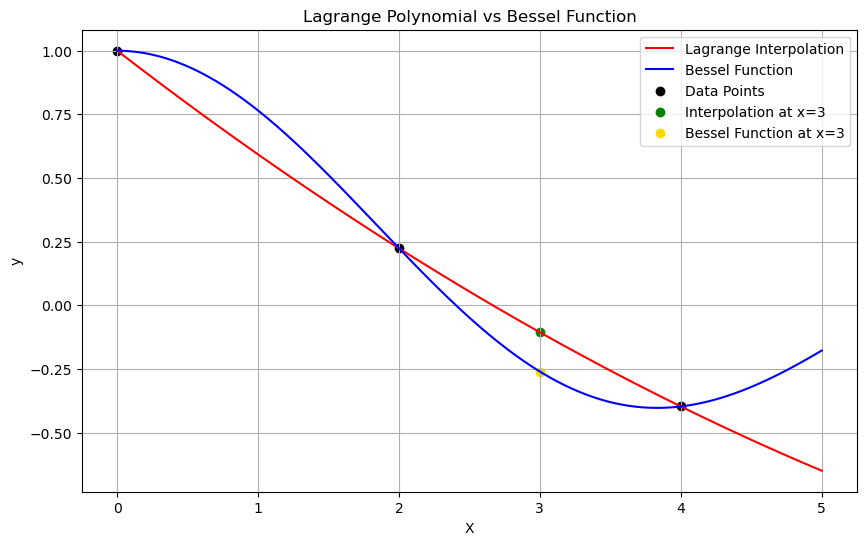

Interpolated value at x=3: -0.106013
Actual value at x=3: -0.260052
Error: 0.154039


In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0 # Import Bessel function

def lagrange_interp(a,f,x):
    """Compute a lagrange interpolant
    Args:
        a: array of n points
        f: array of the value of f(a) at the n points
    Returns:
        The value of the Lagrange interpolant at x
    """
    answer = 0
    assert a.size == f.size
    n = a.size
    for i in range(n):
        product = 1
        for j in range(n):
            if (i != j):
                product *= (x-a[j])/(a[i]-a[j])
        answer += product*f[i]
    return answer

#Given data
x_data = np.array([0,2,4])
y_data = np.array([1, 0.223891, -0.39715])

#Interpolation at x = 3
x_val = 3
interp_result = lagrange_interp(x_data, y_data, x_val) #compute interpolation data at x = 3
true_result = j0(x_val) #compute Bessel result at x = 3
error = abs(interp_result - true_result)

#Plot interpolation and Bessel function
x_vals = np.linspace(0,5,300)
y_interp = np.array([lagrange_interp(x_data, y_data, x) for x in x_vals])
y_bes = j0(x_vals)

plt.figure(figsize = (10,6))
plt.plot(x_vals, y_interp, label = "Lagrange Interpolation", color = "red")
plt.plot(x_vals, y_bes, label = "Bessel Function", color = "blue")
plt.scatter(x_data, y_data, color = "black", label = "Data Points")
plt.scatter(x_val, interp_result, color = "green", label = "Interpolation at x=3")
plt.scatter(x_val, true_result, color = "gold", label = "Bessel Function at x=3")
plt.title("Lagrange Polynomial vs Bessel Function")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

print(f"Interpolated value at x=3: {interp_result:.6f}")
print(f"Actual value at x=3: {true_result:.6f}")
print(f"Error: {error:.6f}")

*The error at x=3 is quite large at a value of 0.154039. Using a different interpolation method may be preferable.*

**Problem 10.2:**

Repeat the previous exercise with a clamped cubic spline and a not-a-knot cubic spline.

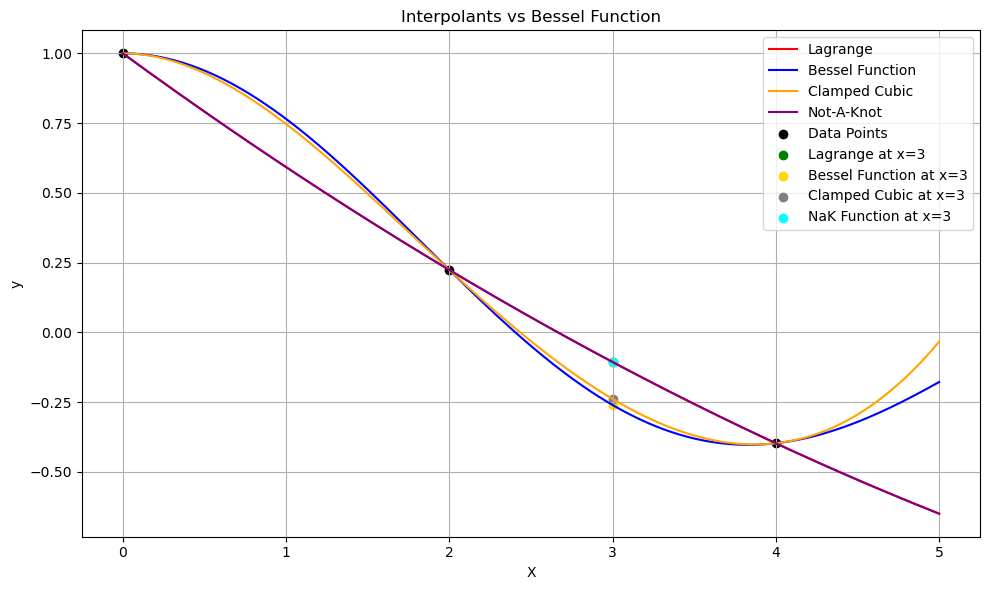

Actual value at x=3: -0.260052

Lagrange value at x=3: -0.106013
Error: 0.154039

Clamped value at x=3: -0.238251
Error: 0.021801

NaK value at x=3: -0.106013
Error: 0.154039



In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0 # Import Bessel function
from scipy.interpolate import CubicSpline

#Given data
x_data = np.array([0,2,4])
y_data = np.array([1, 0.223891, -0.39715])

#Lagrange
def lagrange_interp(a,f,x):
    """Compute a lagrange interpolant
    Args:
        a: array of n points
        f: array of the value of f(a) at the n points
    Returns:
        The value of the Lagrange interpolant at x
    """
    answer = 0
    assert a.size == f.size
    n = a.size
    for i in range(n):
        product = 1
        for j in range(n):
            if (i != j):
                product *= (x-a[j])/(a[i]-a[j])
        answer += product*f[i]
    return answer

#Clamped Cubic Spline
#First compue derivatives
dx = 1e-5
def deriv(x):
    return(j0(x+dx) - j0(x-dx)) / (2*dx)

d0 = deriv(x_data[0])
dN = deriv(x_data[-1])

spline_clamped = CubicSpline(x_data, y_data, bc_type=((1,d0), (1,dN)))

#NaK(default)
spline_nak = CubicSpline(x_data,y_data)

#Interpolation at x = 3
x_val = 3
lagrange_result = lagrange_interp(x_data, y_data, x_val) #compute lagrange data at x = 3
clamped_result = spline_clamped( x_val) #compute clamped cubic at x=3
NaK_result = spline_nak(x_val) #compute NaK at x=3
true_result = j0(x_val) #compute Bessel result at x = 3
error_lagrange = abs(lagrange_result - true_result)
error_clamped = abs(clamped_result - true_result)
error_NaK = abs(NaK_result - true_result)

#Plot interpolations and Bessel function
x_vals = np.linspace(0,5,300)
y_lagrange = np.array([lagrange_interp(x_data, y_data, x) for x in x_vals])
y_clamped = spline_clamped(x_vals)
y_NaK = spline_nak(x_vals)
y_bes = j0(x_vals)

plt.figure(figsize = (10,6))
plt.plot(x_vals, y_lagrange, label = "Lagrange", color = "red")
plt.plot(x_vals, y_bes, label = "Bessel Function", color = "blue")
plt.plot(x_vals, y_clamped, label = "Clamped Cubic", color = "orange")
plt.plot(x_vals, y_NaK, label = "Not-A-Knot", color = "purple")
plt.scatter(x_data, y_data, color = "black", label = "Data Points")
plt.scatter(x_val, lagrange_result, color = "green", label = "Lagrange at x=3")
plt.scatter(x_val, true_result, color = "gold", label = "Bessel Function at x=3")
plt.scatter(x_val, clamped_result, color = "grey", label = "Clamped Cubic at x=3")
plt.scatter(x_val, NaK_result, color = "cyan", label = "NaK Function at x=3")
plt.title("Interpolants vs Bessel Function")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Actual value at x=3: {true_result:.6f}\n")

print(f"Lagrange value at x=3: {lagrange_result:.6f}")
print(f"Error: {error_lagrange:.6f}\n")

print(f"Clamped value at x=3: {clamped_result:.6f}")
print(f"Error: {error_clamped:.6f}\n")

print(f"NaK value at x=3: {NaK_result:.6f}")
print(f"Error: {error_NaK:.6f}\n")

*From the results the clamped cubic is the best interpolation technique. The values at x = 3 for lagrange and NaK are the same which makes sense because they are only being evaluated at 3 data points.*

**Chapter 10 Programming Project 3: Moderator Temperature Coefficient of Reactivity**

The change in the reactivity for a nuclear reactor due to changes in the moderator temperature is called the moderator temperature coefficient of αm is the logarithmic derivative of k∞ for the reactor as

$$
\alpha_m = \frac{1}{k_{\infty}} \frac{\partial k_{\infty}}{\partial T_m} = -\beta_m \left( \log \frac{1}{p} - (1 - f) \right)
$$

where the subscript m denotes “moderator”, p is the resonance escape probability for the reactor, f is the thermal utilization, and βm is

$$
\beta_m = -\frac{1}{N_m} \frac{\partial N_m}{\partial T_m}
$$

with Nm the number density of the moderator. Consider a research reactor that is cooled by natural convection. It has p = 0.63 and f = 0.94. Plot the moderator temperature coefficient from Tm = 285 K to 373 K as a function of temperature for this reactor, using the data below from the National Institute for Standards and Technology (NIST) for Tm in K, and density, ρm , in mol/liter:

| $T_m$     | $\rho_m$   | $\frac{\partial \rho_m}{\partial T_m}$ |
|----------|------------|-----------------------------------------|
| 289.99   | 55.442     | -0.00769 |
| 300.12   | 55.315     | -0.0143  |
| 320.53   | 54.909     | -0.0231  |
| 346.13   | 54.178     | -0.0308  |
| 366.00   | 53.475     | -0.0385  |
| 369.87   | 53.326     | -0.0385  |

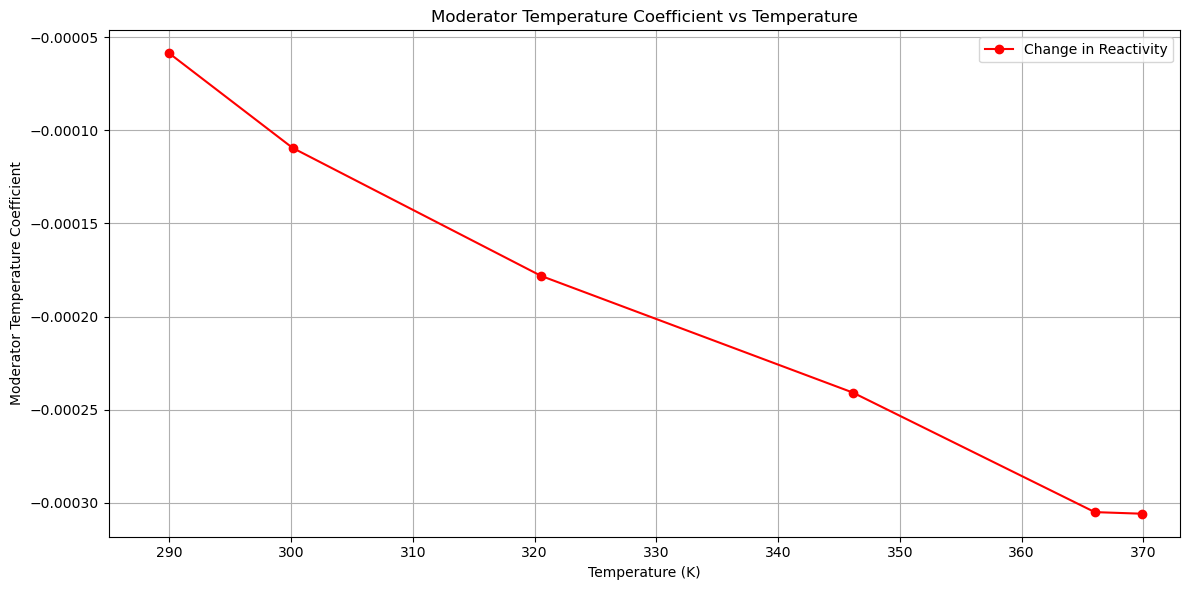

In [153]:
import numpy as np
import matplotlib.pyplot as plt

#Constants
p = 0.63 #Resonance escape probaility
f = 0.94 #Thermal utilization

#Data array given in problem
data = np.array([[289.99, 55.442, -0.00769],
                [300.12, 55.315, -0.0143],
                [320.53, 54.909, -0.0231],
                [346.13, 54.178, -0.0308],
                [366, 53.475, -0.0385],
                [369.87, 53.326, -0.0385]])

#Call data
T = data[:,0] #Temperature in first index
density = data[:,1] #Density in second index
deriv = data[:,2] #Partial in third index

#Compute beta m
beta_m = (-1/density) * deriv

#Compute alpha m
rhs_term = np.log((1/p) - (1 - f))
alpha_m = -beta_m * rhs_term

#Plot
plt.figure(figsize=(12,6))
plt.plot(T, alpha_m, label = "Change in Reactivity", color = "red", marker = "o")
plt.title("Moderator Temperature Coefficient vs Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Moderator Temperature Coefficient")
plt.xlim(285,373) #Range given in problem
plt.legend()
plt.tight_layout()
plt.grid(True)

plt.show()

**Problem 14.1 & 14.2 Prompt:**

Compute using $h = 2^{-1}, 2^{-2}, \dots, 2^{-5}$ and the forward, backward, and centered difference the following derivatives.

In [41]:
""" General Code Without Functions """

import numpy as np
from typing import List, Tuple

#define derivative methods
def approx(f, x, h_vals) -> Tuple[List[float],List[float],List[float],List[float]]: #returns a tuple containing h values, forward, backward, and centered difference approximations

    #define functions
    forward = [(f(x+h)-f(x)) / h for h in h_vals]
    backward = [(f(x)-f(x-h)) / h for h in h_vals]
    centered = [(f(x+h)-f(x-h)) / (2*h) for h in h_vals]

    return h_vals, forward, backward, centered

#define values
x = 0.5
h_vals = [2**(-i) for i in range (1,6)]
    
#unpack tuple into four variables
h_vals, forward, backward, centered = approx(f, x, h_vals)

#print approximations and true value
print("f'(5) approximations")
print(f"{'h':<18} {'Forward':<18} {'Backward':<18} {'Centered Difference':<18}")
print('-' * 76)

for h, fwd, bwd, cnt in zip(h_vals, forward, backward, centered):
    print(f"{h:<18} {fwd:<18.15} {bwd:<18.15} {cnt:<18.12}")

print("\nKnown value of f'(0.5) ≈ 0.70710678118")

f'(5) approximations
h                  Forward            Backward           Centered Difference
----------------------------------------------------------------------------
0.5                0.125358588982476  -0.0869017907830614 0.0192283990997   
0.25               0.0795801752416452 -0.0348221034641494 0.0223790358887   
0.125              0.0524391615421855 -0.00588841348099045 0.0232753740306   
0.0625             0.0381608640513669 0.00885314749739408 0.0235070057744   
0.03125            0.0309013726797147 0.016229423662665  0.0235653981712   

Known value of f'(0.5) ≈ 0.70710678118


**Problem 14.1:** *No complex step approximations*

$f(x) = \sqrt{x}$ at $x = 0.5$. The answer is $f'(0.5) = 2^{-1/2} \approx 0.70710678118$.

In [59]:
import numpy as np
from typing import List, Tuple

#define derivative methods
def approx(f, x, h_vals) -> Tuple[List[float],List[float],List[float],List[float]]: #returns a tuple containing h values, forward, backward, and centered difference approximations

    #define functions
    forward = [(f(x+h)-f(x)) / h for h in h_vals]
    backward = [(f(x)-f(x-h)) / h for h in h_vals]
    centered = [(f(x+h)-f(x-h)) / (2*h) for h in h_vals]

    return h_vals, forward, backward, centered

def f(x: float) -> float: #define sqrt function

    return np.sqrt(x)

#define values
x = 0.5
h_vals = [2**(-i) for i in range (1,6)]
    
#unpack tuple into four variables
h_vals, forward, backward, centered = approx(f, x, h_vals)

#print approximations and true value
print("f'(5) approximations\n")
print(f"{'h':<18} {'Forward':<18} {'Backward':<18} {'Centered Difference':<18}")
print('-' * 76)

for h, fwd, bwd, cnt in zip(h_vals, forward, backward, centered):
    print(f"{h:<18} {fwd:<18.15} {bwd:<18.15} {cnt:<18.12}")

print("\nKnown value of f'(0.5) ≈ 0.70710678118")

f'(5) approximations

h                  Forward            Backward           Centered Difference
----------------------------------------------------------------------------
0.5                0.585786437626905  1.4142135623731    1.0               
0.25               0.635674490391564  0.82842712474619   0.732050807569    
0.125              0.667701070844378  0.757874763926025  0.712787917385    
0.0625             0.686291501015239  0.730703254726398  0.708497377871    
0.03125            0.696390581411681  0.718514697762878  0.707452639587    

Known value of f'(0.5) ≈ 0.70710678118


**Problem 14.2:** *No complex step approximations*

$f(x) = arctan(x^{2} - 0.9x +2)$ at $x = 0.5.$ The answer is $f'(0.5) = \frac{5}{212}.$

In [61]:
import numpy as np
from typing import List, Tuple

#define derivative methods
def approx(f, x, h_vals) -> Tuple[List[float],List[float],List[float],List[float]]: #returns a tuple containing h values, forward, backward, and centered difference approximations

    #define functions
    forward = [(f(x+h)-f(x)) / h for h in h_vals]
    backward = [(f(x)-f(x-h)) / h for h in h_vals]
    centered = [(f(x+h)-f(x-h)) / (2*h) for h in h_vals]

    return h_vals, forward, backward, centered

def f(x: float) -> float: #define arctan function

    return np.arctan(x**2 - 0.9*x +2)

#define values
x = 0.5
h_vals = [2**(-i) for i in range (1,6)]
    
#unpack tuple into four variables
h_vals, forward, backward, centered = approx(f, x, h_vals)

#print approximations and true value
print("f'(5) approximations\n")
print(f"{'h':<18} {'Forward':<18} {'Backward':<18} {'Centered Difference':<18}")
print('-' * 76)

for h, fwd, bwd, cnt in zip(h_vals, forward, backward, centered):
    print(f"{h:<18} {fwd:<18.12} {bwd:<18.12} {cnt:<18.12}")

print(f"\nKnown value of f'(0.5) ≈ {5/212}")

f'(5) approximations

h                  Forward            Backward           Centered Difference
----------------------------------------------------------------------------
0.5                0.125358588982     -0.0869017907831   0.0192283990997   
0.25               0.0795801752416    -0.0348221034641   0.0223790358887   
0.125              0.0524391615422    -0.00588841348099  0.0232753740306   
0.0625             0.0381608640514    0.00885314749739   0.0235070057744   
0.03125            0.0309013726797    0.0162294236627    0.0235653981712   

Known value of f'(0.5) ≈ 0.02358490566037736


**Problem 15.1 & 15.2 Prompt:**

Using the trapezoid rule and Simpson’s rule estimate the following integrals with the following number of intervals: 2, 4, 8, 16, . . . 512. Compare your answers with Romberg integration where the maximum number of levels set to 9.

In [63]:
""" General Functions for trapezoid rule, Simpson's rule, Romberg integration, and Richardson Extrapolation """

#Trapezoid
def trapezoid(f, a, b, pieces):
    """Find the integral of the function f between a and b
    using pieces trapezoids
    Args:
        f: function to integrate
        a: lower bound of integral
        b: upper bound of integral
        pieces: number of pieces to chop [a,b] into
    Returns:
        estimate of integral
    """
    integral = 0
    h = b - a
    #initialize the left function evaluation
    fa = f(a)
    for i in range(pieces):
        #evaluate the function at the left end of the piece
        fb = f(a+(i+1)*h/pieces)
        integral += 0.5*h/pieces*(fa + fb)
        #now make the left function evaluation the right for the next step
        fa = fb
    return integral

#Simpson's
def simpsons(f, a, b, pieces):
    """Find the integral of the function f between a and b
    using Simpson’s rule
    Args:
        f: function to integrate
        a: lower bound of integral
        b: upper bound of integral
        pieces: number of pieces to chop [a,b] into
    Returns:
        estimate of integral
    """
    integral = 0
    h = b - a
    one_sixth = 1.0/6.0
    #initialize the left function evaluation
    fa = f(a)
    for i in range(pieces):
        #evaluate the function at the left end of the piece
        fb = f(a+(i+1)*h/pieces)
        fmid = f(0.5*(a+(i+1)*h/pieces+ a+i*h/pieces))
        integral += one_sixth*h/pieces*(fa + 4*fmid + fb)
        #now make the left function evaluation the right for the next step
        fa = fb
    return integral

#Romberg
def Romberg(f, a, b, MaxLevels = 10, epsilon = 1.0e-6, PrintMatrix = False):
    """Compute the Romberg integral of f from a to b
    Inputs:
    f:  integrand function
    a: left edge of integral
    b: right edge of integral
    MaxLevels: Number of levels to take the integration to
    
    Returns:
    Romberg integral estimate"""
    
    estimate = np.zeros((MaxLevels,MaxLevels))
    
    estimate[0,0] = trapezoid(f,a,b,pieces=1)
    count = 1
    converged = 0
    while not(converged):
        estimate[count,0] = trapezoid(f,a,b,pieces=2**count)
        for extrap in range(count):
            estimate[count,1+extrap] = RichardsonExtrapolation(estimate[count-1,extrap],
                                                               estimate[count,extrap],2,2**(extrap+1))
        
        converged = np.fabs(estimate[count,count] - estimate[count-1,count-1]) < epsilon
        if (count == MaxLevels-1): converged = 1
        count += 1
    if (PrintMatrix):
        print(estimate[0:count,0:count])
    return estimate[count-1, count-1]

#Richardson
def RichardsonExtrapolation(fh, fhn, n, k):
    """Compute the Richardson extrapolation based on two approximations of order k
    where the finite difference parameter h is used in fh and h/n in fhn.
    Inputs:
    fh:  Approximation using h
    fhn: Approximation using h/n
    n:   divisor of h
    k:   original order of approximation
    
    Returns:
    Richardson estimate of order k+1"""
    n = decimal.Decimal(n)
    k = decimal.Decimal(k)
    numerator = decimal.Decimal(n**k * decimal.Decimal(fhn) - decimal.Decimal(fh))
    denominator = decimal.Decimal(n**k - decimal.Decimal(1.0))
    return float(numerator/denominator)

**Problem 15.1:**

$\int_{0}^{\pi/2} e^{\sin x} \, dx \approx 3.104379017855555098181.$

In [81]:
import numpy as np
import decimal
from typing import Callable

#Set precision for for Richardson
decimal.getcontext().prec = 100

#Define integrand
def f(x):
    return np.exp(np.sin(x))

#Trapezoid
def trapezoid(f: Callable, a: float, b: float, pieces: int) -> float:
    
    h = (b - a) / pieces
    total = 0.5 * (f(a) + f(b))
    for i in range(1, pieces):
        total += f(a + i * h)
    return h * total

#Simpson's
def simpsons(f: Callable, a: float, b: float, pieces: int) -> float:

    if pieces % 2:
        raise ValueError("Simpson's rule must have an even number of intervals:")
    h = (b - a) / pieces
    total = f(a) + f(b)
    for i in range(1, pieces):
        coeff = 4 if i % 2 != 0 else 2
        total += coeff * f(a + i * h)
    return h * total / 3

#Richardson
def RichardsonExtrapolation(fh, fhn, n, k):
    
    n = decimal.Decimal(n)
    k = decimal.Decimal(k)
    fh = decimal.Decimal(fh)
    fhn = decimal.Decimal(fhn)
    numerator = n**k * fhn - fh
    denominator = n**k - decimal.Decimal(1)
    return float(numerator/denominator)

#Romberg
def Romberg(f: Callable, a: float, b: float, MaxLevels = 9, epsilon = 1.0e-12, PrintMatrix = False) -> float:

    estimate = np.zeros((MaxLevels,MaxLevels))
    estimate[0,0] = trapezoid(f,a,b,1)
    
    for level in range(1, MaxLevels):
        pieces = 2 ** level
        estimate[level,0] = trapezoid(f,a,b,pieces)
        for k in range(1, level + 1):
            estimate[level, k] = RichardsonExtrapolation(estimate[level-1,k-1],
                                                               estimate[level,k-1],2,k=k)
        
        if abs(estimate[level,level] - estimate[level-1,level-1]) < epsilon:
            if PrintMatrix:
                print("Romberg Table (Converged):\n", estimate[:level+1, :level+1])

            return estimate[level,level]
        
    if PrintMatrix:
        print("Romberg Table (Max Level Reached:\n", estimate)
    return estimate[MaxLevels - 1, MaxLevels - 1]

#Evaluate
a = 0
b = np.pi / 2
actual = 3.104379017855555098181
intervals = [2**i for i in range(1,10)] #Intervals of 2 to 512

print(f"{'n':<6} {'Trapezoid':<20} {'Simpson':<20} {'Error (Trap)':<15} {'Error (Simp}':<15}")
print("-" * 80)

for n in intervals:
    trap = trapezoid(f,a,b,n)
    simp = simpsons(f,a,b,n)
    trap_err = abs(trap-actual)
    simp_err = abs(simp-actual)
    print(f"{n:<6} {trap:<20.15} {simp:<20.15} {trap_err:<15.3e} {simp_err:<15.3e}")

romb = Romberg(f,a,b,MaxLevels=9,PrintMatrix=True)
romb_err = abs(romb-actual)

print(f"\nRomberg Estimate: {romb:.15f}")
print(f"Romberg Error: {romb_err:.3e}")

n      Trapezoid            Simpson              Error (Trap)    Error (Simp}   
--------------------------------------------------------------------------------
2      3.05304364127769     3.09728094868165     5.134e-02       7.098e-03      
4      3.09152896664021     3.10435740842771     1.285e-02       2.161e-05      
8      3.10116627126798     3.1043787061439      3.213e-03       3.117e-07      
16     3.10357582763049     3.10437901308467     8.032e-04       4.771e-09      
32     3.10417822024368     3.1043790177814      2.008e-04       7.415e-11      
64     3.10432881845172     3.1043790178544      5.020e-05       1.156e-12      
128    3.10436646800458     3.10437901785554     1.255e-05       1.776e-14      
256    3.10437588039281     3.10437901785555     3.137e-06       4.441e-16      
512    3.10437823348987     3.10437901785555     7.844e-07       4.441e-16      
Romberg Table (Max Level Reached:
 [[2.92033172 0.         0.         0.         0.         0.
  0.         0

*Simpson's Rule was the most accurate method*

**Problem 15.2:**

$\int_{0}^{2.405} J_0(x)dx \approx 1.47030003548$ where $J_0(x)$ is a Bessel function of the first kind given by

$$
J_\alpha(x) = \sum_{m=0}^\infty \frac{(-1)^m}{m! \, \Gamma(m + \alpha + 1)} \left( \frac{x}{2} \right)^{2m + \alpha}.
$$

In [89]:
"""Similar setupe as the last problem but must befine the Bessel function and alter bounds and actual value"""

import numpy as np
import decimal
from typing import Callable
import math

#Set precision for for Richardson
decimal.getcontext().prec = 100

def J0(x, terms=100):
    total = 0
    for m in range(terms):
        num = (-1)**m*(x/2)**(2*m)
        den = math.factorial(m)*math.gamma(m+1)
        total += num/den
    return total

#Trapezoid
def trapezoid(f: Callable, a: float, b: float, pieces: int) -> float:
    
    h = (b - a) / pieces
    total = 0.5 * (f(a) + f(b))
    for i in range(1, pieces):
        total += f(a + i * h)
    return h * total

#Simpson's
def simpsons(f: Callable, a: float, b: float, pieces: int) -> float:

    if pieces % 2:
        raise ValueError("Simpson's rule must have an even number of intervals:")
    h = (b - a) / pieces
    total = f(a) + f(b)
    for i in range(1, pieces):
        coeff = 4 if i % 2 != 0 else 2
        total += coeff * f(a + i * h)
    return h * total / 3

#Richardson
def RichardsonExtrapolation(fh, fhn, n, k):
    
    n = decimal.Decimal(n)
    k = decimal.Decimal(k)
    fh = decimal.Decimal(fh)
    fhn = decimal.Decimal(fhn)
    numerator = n**k * fhn - fh
    denominator = n**k - decimal.Decimal(1)
    return float(numerator/denominator)

#Romberg
def Romberg(f: Callable, a: float, b: float, MaxLevels = 9, epsilon = 1.0e-12, PrintMatrix = False) -> float:

    estimate = np.zeros((MaxLevels,MaxLevels))
    estimate[0,0] = trapezoid(f,a,b,1)
    
    for level in range(1, MaxLevels):
        pieces = 2 ** level
        estimate[level,0] = trapezoid(f,a,b,pieces)
        for k in range(1, level + 1):
            estimate[level, k] = RichardsonExtrapolation(estimate[level-1,k-1],
                                                               estimate[level,k-1],2,k=k)
        
        if abs(estimate[level,level] - estimate[level-1,level-1]) < epsilon:
            if PrintMatrix:
                print("Romberg Table (Converged):\n", estimate[:level+1, :level+1])

            return estimate[level,level]
        
    if PrintMatrix:
        print("Romberg Table (Max Level Reached:\n", estimate)
    return estimate[MaxLevels - 1, MaxLevels - 1]

#Evaluate
a = 0
b = 2.405
actual = 1.47030003548
intervals = [2**i for i in range(1,10)] #Intervals of 2 to 512

print(f"{'n':<6} {'Trapezoid':<20} {'Simpson':<20} {'Error (Trap)':<15} {'Error (Simp}':<15}")
print("-" * 80)

for n in intervals:
    trap = trapezoid(J0,a,b,n)
    simp = simpsons(J0,a,b,n)
    trap_err = abs(trap-actual)
    simp_err = abs(simp-actual)
    print(f"{n:<6} {trap:<20.15} {simp:<20.15} {trap_err:<15.3e} {simp_err:<15.3e}")

romb = Romberg(J0,a,b,MaxLevels=9,PrintMatrix=True)
romb_err = abs(romb-actual)

print(f"\nRomberg Estimate: {romb:.15f}")
print(f"Romberg Error: {romb_err:.3e}")

n      Trapezoid            Simpson              Error (Trap)    Error (Simp}   
--------------------------------------------------------------------------------
2      1.40673373505188     1.47484794540115     6.357e-02       4.548e-03      
4      1.45459973536834     1.47055506880717     1.570e-02       2.550e-04      
8      1.466386614065       1.47031557363055     3.913e-03       1.554e-05      
16     1.46932240391708     1.47030100053444     9.776e-04       9.651e-07      
32     1.47005567275929     1.4703000957067      2.444e-04       6.023e-08      
64     1.47023894762572     1.47030003924786     6.109e-05       3.768e-09      
128    1.47028476369691     1.47030003572063     1.527e-05       2.406e-10      
256    1.47029621754938     1.47030003550021     3.818e-06       2.021e-11      
512    1.47029908100217     1.47030003548643     9.545e-07       6.429e-12      
Romberg Table (Max Level Reached:
 [[1.2023911  0.         0.         0.         0.         0.
  0.         0

*Again Simpson's Rule is most accurate, however the Romberg estimate is also very close*